# Q3: Unitary Synthesis [3 points]

In this problem, you'll implement a brute force, approximate, single-qubit unitary synthesis algorithm using the Clifford + T gate set. It has been broken down into small parts, so don't be intimidated by the number of subquestions.

## Part A: Hilbert-Schmidt distance

Our algorithm should guarantee the output circuit is close to the target unitary. This distance can be quantified using something called the Hilbert-Schmidt distance, where $n$ is the number of qubits:
$$HS(U_1, U_2) := \sqrt{1-\frac{| Tr(U_1^\dagger U_2)| ^2}{2^{2n}}}$$

This outputs a value between 0 and 1 (inclusive) that indicates how close the two untaries are. 0 means they are equal up to global phase and 1 means they are very not equal.

Is this distance function symmetric? i.e. is $HS(U_1, U_2)$ equal to $HS(U_2, U_1)$? Either prove it is symmetric or provide a counterexample.

## Part A Answer:

The Hilbert-Schmidt distance is symmetric because the trace terms differ only by a complex conjugate, which does not affect their magnitudes. Thus, swapping $U_1$​ and $U_2$​ leaves the distance unchanged:

$$
Tr((U1^†​U2​)^†)=Tr(U1^†​U2​)^∗, so
∣Tr(U2^†U1)∣^2=∣Tr(U1^†U2)∣^2
$$

## Part B: Implement the Hilbert-Schmidt distance function

Fill in the function below to compute the Hilbert-Schmidt (HS) distance.

In [6]:
import numpy as np
from numpy.typing import NDArray
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator

def get_unitary_from_circuit(circuit: QuantumCircuit):
    return Operator(circuit).data

def hilbert_schmidt(unitary1: NDArray, unitary2: NDArray) -> float:
    unitary1 = np.asarray(unitary1)
    unitary2 = np.asarray(unitary2)
    matrix_size = unitary1.shape[0]
    U1_dagger = unitary1.conj().T
    product = U1_dagger @ unitary2
    tr = np.trace(product)
    abs_sq = np.abs(tr) ** 2
    denominator = matrix_size ** 2
    hs_squared = 1.0 - (abs_sq / denominator)
    hs_squared = max(hs_squared, 0.0)  # Ensure non-negative result
    return np.sqrt(hs_squared)

# A test. Do not delete anything below this and make sure the output is included in your submission.
target_unitary = np.matrix([[-0.63093663-0.52401339j,  0.2720076 +0.50332971j],
       [ 0.42561408+0.38233701j,  0.36164925+0.73612559j]])
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.t(0)

print(hilbert_schmidt(target_unitary, get_unitary_from_circuit(circuit)))

0.9706897908608413


Is the unitary this circuit implements close to the target unitary?

No

## Part C: Implement unitary synthesis

Implement a function to synthesize a quantum circuit that is within epsilon of the target unitary, as measured by the HS distance.

Fill in the function below.

In [7]:
import numpy as np
from numpy.typing import NDArray
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
# Your function should return a circuit with only these gates
cliffordt_gate_set_1q = ["h", "s", "t"]

"""
target_unitary: the unitary to implement
epsilon: a float between 0 and 1 (inclusive)

Returns a qiskit.QuantumCircuit object such that hilbert_schmidt(target_unitary, get_unitary_from_circuit(synthesize(target_unitary, epsilon))) <= epsilon is True.
"""
def synthesize(target_unitary, epsilon: float) -> QuantumCircuit:
    limit = -1
    def synthesize_helper(cur: QuantumCircuit, depth: int) -> QuantumCircuit:
        if hilbert_schmidt(target_unitary, get_unitary_from_circuit(cur)) < epsilon:
            return cur.copy()
        if depth > limit:
            return None
        initial_length = len(cur.data)
        for gate in cliffordt_gate_set_1q:
            if gate == "h":
                cur.h(0)
            elif gate == "s":
                cur.s(0)
            else:
                cur.t(0)
            tmp = synthesize_helper(cur, depth + 1)
            cur.data = cur.data[:initial_length]
            if tmp != None:
                return tmp
        return None
    ans = None
    while ans == None:
        limit += 1
        ans = synthesize_helper(cur=QuantumCircuit(1), depth=0)
    return ans
    

# A test. Do not delete anything below this and make sure the output is included in your submission.
target_unitary = np.matrix([[-0.63093663-0.52401339j,  0.2720076 +0.50332971j],
       [ 0.42561408+0.38233701j,  0.36164925+0.73612559j]])
synthesized_circuit = synthesize(target_unitary, 0.5)
print(synthesized_circuit)
print(hilbert_schmidt(target_unitary, get_unitary_from_circuit(synthesized_circuit)) <= 0.5)

   ┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ S ├┤ S ├┤ H ├┤ S ├┤ S ├
   └───┘└───┘└───┘└───┘└───┘
True


## Part D: Scalability

Sweep the following epsilon values and plot the time in seconds it takes to find a solution.

ε = 1, time = 0.00 seconds
ε = 0.9, time = 0.00 seconds
ε = 0.8, time = 0.05 seconds
ε = 0.7, time = 0.00 seconds
ε = 0.6, time = 0.00 seconds
ε = 0.5, time = 0.11 seconds
ε = 0.4, time = 0.11 seconds
ε = 0.3, time = 0.11 seconds
ε = 0.2, time = 14.38 seconds


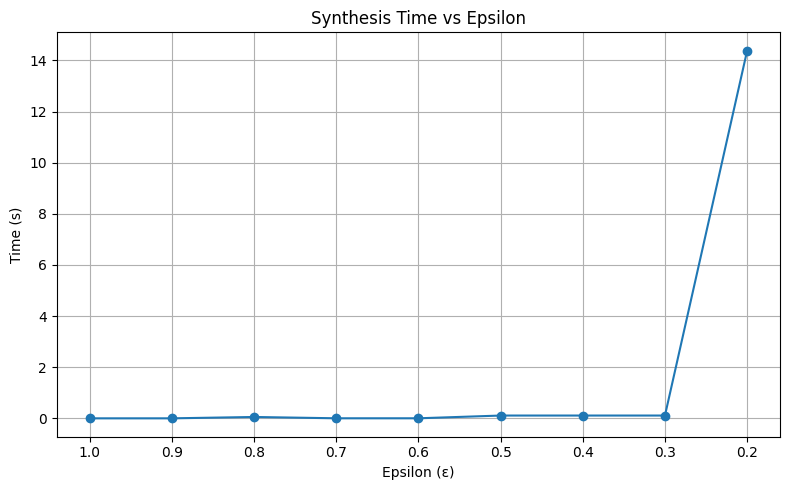

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
target_unitary = np.matrix([[-0.63093663-0.52401339j,  0.2720076 +0.50332971j],
       [ 0.42561408+0.38233701j,  0.36164925+0.73612559j]])
epsilons = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

times = []

for eps in epsilons:
    start = time.time()
    synthesize(target_unitary, eps)
    end = time.time()
    times.append(end - start)
    print(f"ε = {eps}, time = {end - start:.2f} seconds")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(epsilons, times, marker='o')
plt.xlabel("Epsilon (ε)")
plt.ylabel("Time (s)")
plt.title("Synthesis Time vs Epsilon")
plt.grid(True)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

What does the plot tell you about how this algorithm scales?

The algorithm exhibits exponential time scaling as ε decreases.

## Part E: Why is unitary synthesis important?

Why do we even need to solve this problem? What is the significance of the Clifford + T gate set and what type of gate does it fail to support natively?

1. Solving this problem is to turn arbitrary gates into fault-tolerant gate sequences.
2. Clifford+T is a universal but hardware-aware gate set. Only Clifford set cannot represent some arbitrary rotations in bloch sphere.
3. It can't do arbitrary rotations directly, so it needs to approximate them using a sequence of just H, S, and T gates.